# Первая домашняя работа.

## Вариант 4

# Задача 1.8.18

Рассмотрим модель представления чисел в IEEE-арифметике следующего вида:
S = {±b0, b1b2b3·$2^{±a}$}, где числа a, b1 , b2 , b3 $\in$ {0,1} , а число b0 = 1 всегда,
кроме того случая, когда a = b1 = b2 = b3 = 0, в этом случае b0 $\in$ {0,1}.

а) Построить множество S на действительной оси. Сколько чисел в данной
модели арифметики у Вас получилось?

б) Чему равны машинные константы εмаш, UFL, OFL в этой модели?

а) Когда $b_1 = b_2 = b_3 = a = 0$, при $b_0$ = 0 Получаем 0, а остальные варианты учтутся в общем случае.
Когда мы зафиксировали $b_0$, можно независимо менять $b_i$ и а. Однако легко заметить, что мы можем несколькими способами получить одно и то же число $\frac{1}{2}$ (При $b_0 = 1, b_2 = 0 = b_3 = b_4$, a = 1 и выборе знака минус в показателе степени и При $b_1 = 1, b_0 = b_2 = 0 = b_3$, a = 0) Поэтому логично ожидать, что всего чисел можно будеть получить меньше, чем 65 (всевозможные комбинации $b_0, b_1, b_2, b_3, a$ с учётом ограничений)

Всего возможны 65 комбинаций
Можно получить 49 различных чисел


Text(1, 0.02, 'Всего возможны 65 комбинаций\nМожно получить 49 различных чисел')

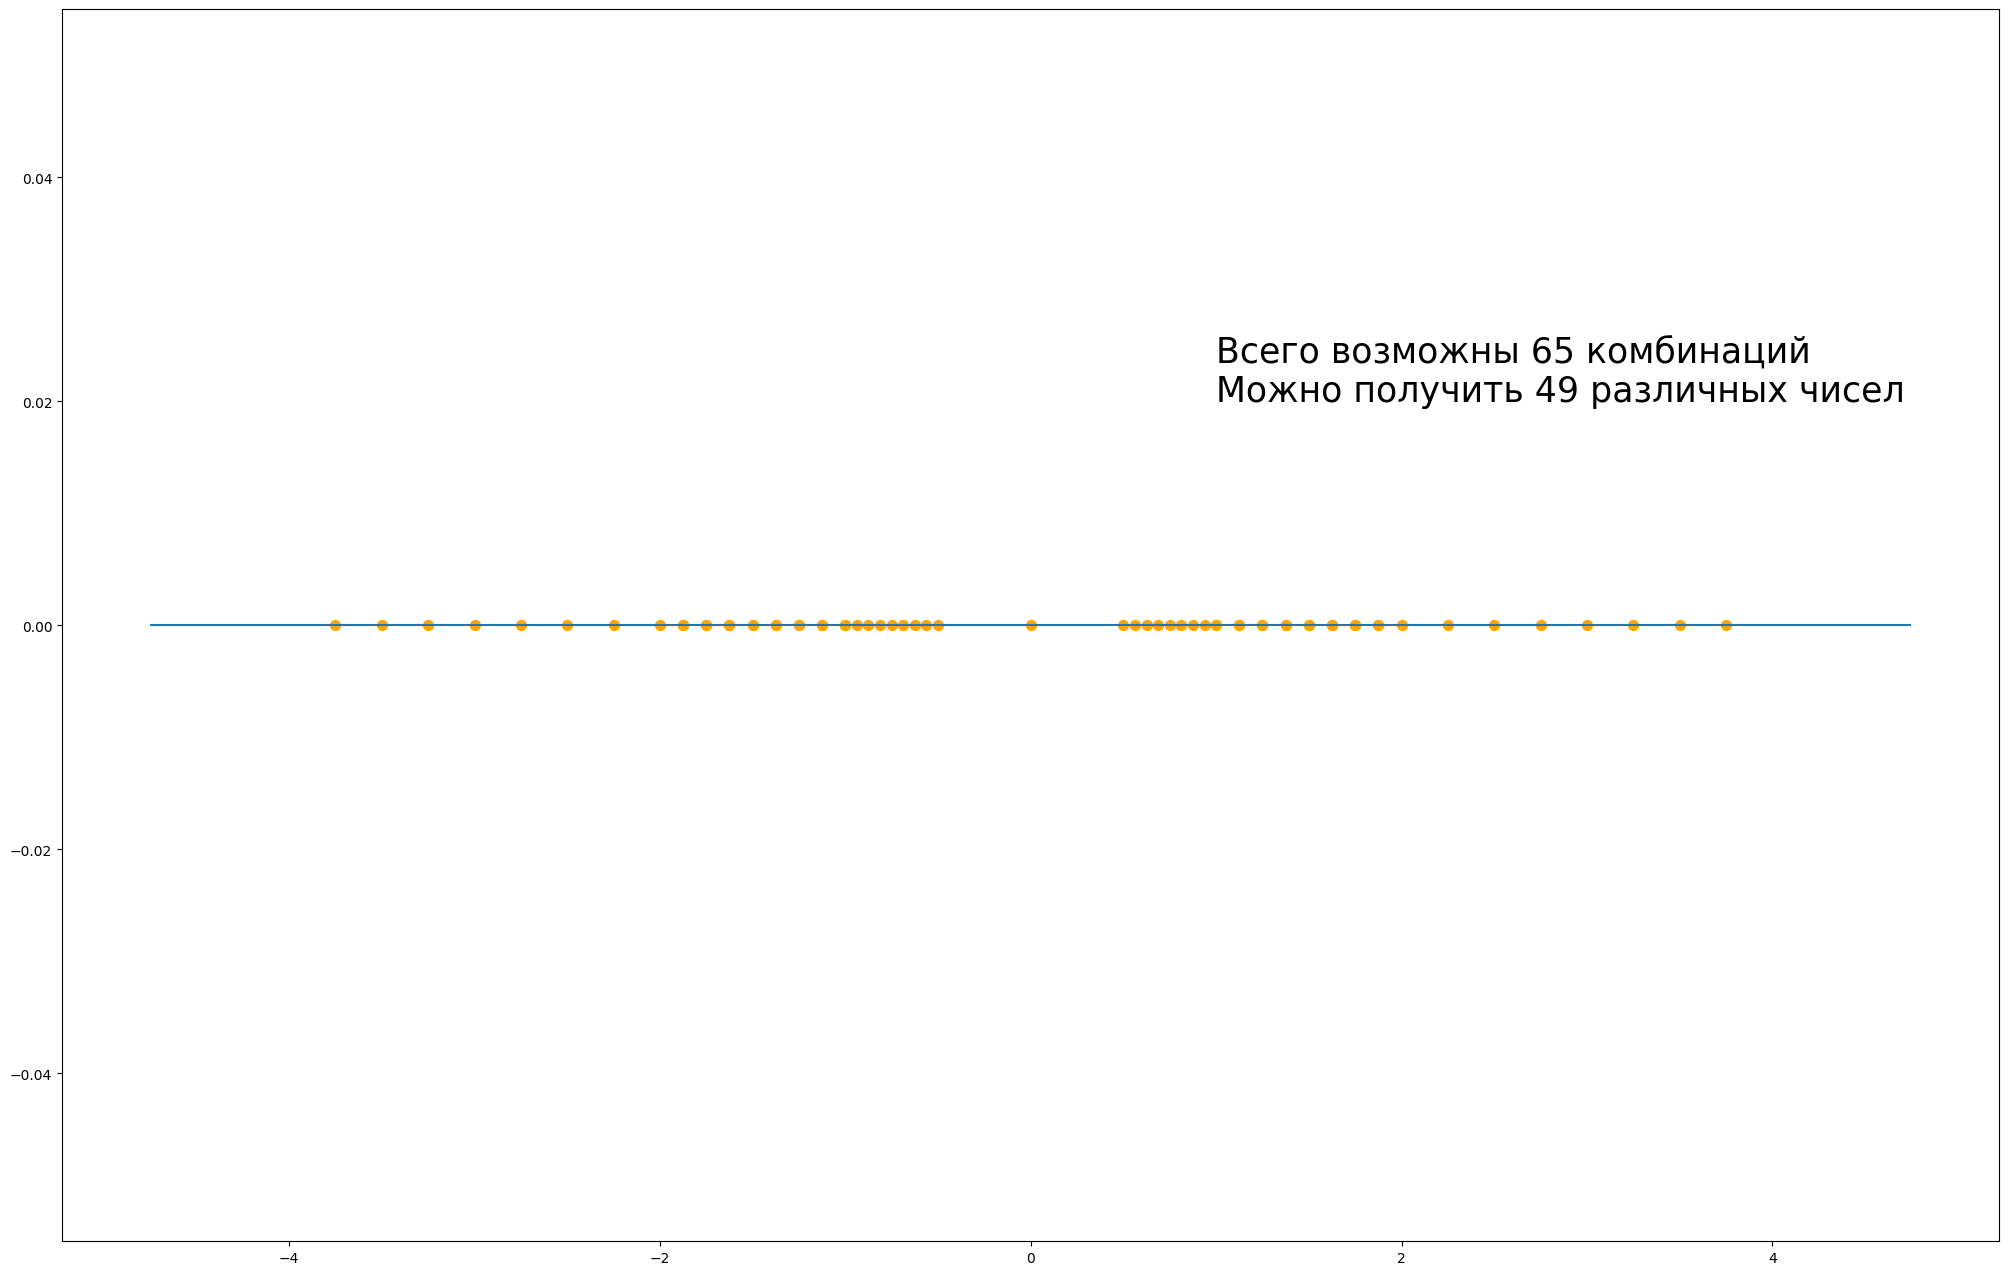

In [253]:
import matplotlib.pyplot as plt
numbers = []
digits = [0, 1]
for b1 in digits:
    for b2 in digits:
        for b3 in digits:
            for a in digits:
                numbers.append((1 + b1 / 2 + b2 / 4 + b3 / 8) * (2 ** (a)))
                numbers.append((1 + b1 / 2 + b2 / 4 + b3 / 8) * (2 ** (-a)))
                numbers.append(-(1 + b1 / 2 + b2 / 4 + b3 / 8) * (2 ** (a)))
                numbers.append(-(1 + b1 / 2 + b2 / 4 + b3 / 8) * (2 ** (-a)))
numbers.append(0)
fig = plt.figure(figsize=(25, 16))
print("Всего возможны " + str(len(numbers)) +" комбинаций")
numbers_set = set(numbers)
print("Можно получить " + str(len(numbers_set)) + " различных чисел")
plt.hlines(0, xmin=min(numbers)-1, xmax=max(numbers)+1)
plt.scatter(numbers, [0] * len(numbers), c="orange", s=50)
plt.text(1, 0.02, "Всего возможны " + str(len(numbers)) +" комбинаций\nМожно получить " + str(len(numbers_set)) + " различных чисел", fontsize=25)

Получаем, что число различных чисел, которые можно получить, всего 49 (что меньше чем число всевозможных комбинаций $b_1, b_2, b_3, b_0, a$)

Б) По определению UFL - наименьшее по модулю число, Представимое данным способом. В нашем примере это:

In [245]:
numbers_set.remove(0.0)
print(min(abs(number) for number in numbers_set))

0.5


По тем же рассуждениям OFL:

In [40]:
print(max(abs(number) for number in numbers_set))

3.75


Наконец, $\epsilon_{Маш}$ = $2^{-M-1}$,

где $M$ - число бит для Мантиссы (здесь это 3)

$\frac{1}{2^4} = \frac{1}{16}$

Ответ: а) Можно получить 49 различных числе, Б) UFL = 0.5, OFL = 3.75, $\epsilon_{Маш}$ =$\frac{1}{16}$

### Задача 1*.4

a) Методом неопределенных коэффициентов на заданом шаблоне получить формулу
численого дифференцирования максимально возможного порядка аппроксимации.
Указать полученный порядок аппроксимации.

b) Вывести выражение для оценки ошибки численного дифференцировании с учетом
неточности вычислений значений функции. Получить аналитическое выражение
для оптимального шага численного дифференцирования и соответствующей ему
ошибки дифференцирования.

c) Программно реализовать полученную формулу численного дифференцирования
для вычисления соответствующей производной функции 𝑓 (𝑥) в точке 𝑥0 .

d) Постройте на одном графике экспериментальную и теоретическую зависимости
ошибки от шага численного дифференцирования при использовании арифметики
с плавающей точкой одинарной и двойной точности. Сделать вывод о соответсвтии
теоретической оценки результатам численных расчетов экспериментов.

$G" = aG(x_0 - 2h) + bG(x_0 - h) + cG(x_0) + dG(x_0 + h) + eG(x_0 + 2h)$

$G(x) = x^5$, $x_0 = 1$

Перепишем фукнцию в виде выражения в SyMPy

In [3]:
import sympy as mp
x, x0 = mp.symbols('x x0')
h = mp.symbols('h', real = True)
b, a, c, d, e = mp.symbols('b a c d e')
G = mp.Function('G')(x0)
GPlus = mp.Function('G')(x0 + h)
GMin = mp.Function('G')(x0 - h)
GPlusPlus = mp.Function('G')(x0 + 2 * h)
GMinMin = mp.Function('G')(x0 - 2 * h)
MPG = a * GMinMin + b * GMin + c * G + d * GPlus + e * GPlusPlus
MPG

a*G(-2*h + x0) + b*G(-h + x0) + c*G(x0) + d*G(h + x0) + e*G(2*h + x0)

Представим $G$ рядом:

In [4]:
mp.series(MPG, h, 0)

h*(-2*a*Subs(Derivative(G(_xi_1), _xi_1), _xi_1, x0) - b*Subs(Derivative(G(_xi_1), _xi_1), _xi_1, x0) + d*Subs(Derivative(G(_xi_1), _xi_1), _xi_1, x0) + 2*e*Subs(Derivative(G(_xi_1), _xi_1), _xi_1, x0)) + h**2*(2*a*Subs(Derivative(G(_xi_1), (_xi_1, 2)), _xi_1, x0) + b*Subs(Derivative(G(_xi_1), (_xi_1, 2)), _xi_1, x0)/2 + d*Subs(Derivative(G(_xi_1), (_xi_1, 2)), _xi_1, x0)/2 + 2*e*Subs(Derivative(G(_xi_1), (_xi_1, 2)), _xi_1, x0)) + h**3*(-4*a*Subs(Derivative(G(_xi_1), (_xi_1, 3)), _xi_1, x0)/3 - b*Subs(Derivative(G(_xi_1), (_xi_1, 3)), _xi_1, x0)/6 + d*Subs(Derivative(G(_xi_1), (_xi_1, 3)), _xi_1, x0)/6 + 4*e*Subs(Derivative(G(_xi_1), (_xi_1, 3)), _xi_1, x0)/3) + h**4*(2*a*Subs(Derivative(G(_xi_1), (_xi_1, 4)), _xi_1, x0)/3 + b*Subs(Derivative(G(_xi_1), (_xi_1, 4)), _xi_1, x0)/24 + d*Subs(Derivative(G(_xi_1), (_xi_1, 4)), _xi_1, x0)/24 + 2*e*Subs(Derivative(G(_xi_1), (_xi_1, 4)), _xi_1, x0)/3) + h**5*(-4*a*Subs(Derivative(G(_xi_1), (_xi_1, 5)), _xi_1, x0)/15 - b*Subs(Derivative(G(_xi_1

Перейдём к системе:

In [5]:
def sum(x):
    return mp.series(MPG, h, 0).subs(h, x)
term = sum(h).series(h, n = None)
eq1 = mp.Eq(next(term).simplify() / G, 0)
eq2 = mp.Eq((next(term) / h).simplify() / mp.diff(G, x0), 0)
eq3 = mp.Eq((next(term) / h ** 2).simplify() / mp.diff(mp.diff(G, x0)), 1/(h**2))
eq4 = mp.Eq((next(term) / h ** 3).simplify() / mp.diff(mp.diff(mp.diff(G, x0))), 0)
eq5 = mp.Eq((next(term) / h ** 4).simplify() / mp.diff(mp.diff(mp.diff(mp.diff(G, x0)))), 0)
args = mp.solve([eq1, eq2, eq3, eq4, eq5], [a, b, c, d, e])
args

{a: -1/(12*h**2),
 b: 4/(3*h**2),
 c: -5/(2*h**2),
 d: 4/(3*h**2),
 e: -1/(12*h**2)}

Получаем:

In [6]:
MPG.subs(args)

-5*G(x0)/(2*h**2) - G(-2*h + x0)/(12*h**2) + 4*G(-h + x0)/(3*h**2) + 4*G(h + x0)/(3*h**2) - G(2*h + x0)/(12*h**2)

Проверим результат, вновь расписав ряд:

In [7]:
mp.series(MPG.subs(args), h, 0).simplify()

Derivative(G(x0), (x0, 2)) - h**4*Derivative(G(x0), (x0, 6))/90 + O(h**6)

Получаем, что наша формула имеет ПОрядок аппроксиМации 4. Очевидно, формулу Более высокого Порядка Получить невозможно (ведь для одонозначного задания 5 переменных необходимо и достаточно 5 уравнений)

Получаем для коэффичиентов:

In [8]:
mp.Eq(a, mp.Eq(b, args[e]))

Eq(a, Eq(b, -1/(12*h**2)))

In [9]:
mp.Eq(b, mp.Eq(args[b], d))

Eq(b, Eq(4/(3*h**2), d))

In [10]:
mp.Eq(c, args[c])

Eq(c, -5/(2*h**2))

Получаем для погрешности связаной с конечностью h выражение:

In [11]:
M = mp.symbols('M')
E = M * h**4 / 90
E

M*h**4/90

Где $M$ - Максимальное значение шестой производной функции на отрезке $[x_0 - 2h, x_0 + 2h]$

Поскольку в компьютере вещественные числа представляюстя с погрешностью, необходимо учесть и это. Пусть $G^*(x_0)$ - истинное значение $G$ При $x = x_0$, в компьютере хранится $G^*(1+\epsilon)$, где $\epsilon \leq \epsilon_M$ ($\epsilon_M$ - Машинное $\epsilon$)

Предполагая, что арифметические операции вычисляются без ошибок, получим для погрешности:

In [12]:
epsM, eps1, eps2, eps3, eps4, eps5 = mp.symbols('epsilon_M epsilon_1 epsilon_2 epsilon_3 epsilon_4 epsilon_5')
res = (a * (1+eps1) * GMinMin + b * (1 + eps2) * GMin + c * (1 + eps3) * G + d * (1 + eps4) *
     GPlus + e * (1 + eps5) * GPlusPlus - MPG).simplify()
res

a*epsilon_1*G(-2*h + x0) + b*epsilon_2*G(-h + x0) + c*epsilon_3*G(x0) + d*epsilon_4*G(h + x0) + e*epsilon_5*G(2*h + x0)

Можно принять для оценки все $\epsilon$ равными $\epsilon_M$

In [13]:
res.subs({eps1 : epsM, eps2 : epsM, eps3 : epsM, eps4 :epsM, eps5: epsM} | args)

-5*epsilon_M*G(x0)/(2*h**2) - epsilon_M*G(-2*h + x0)/(12*h**2) + 4*epsilon_M*G(-h + x0)/(3*h**2) + 4*epsilon_M*G(h + x0)/(3*h**2) - epsilon_M*G(2*h + x0)/(12*h**2)

Пусть $P$ - Максимальное значение $G$ на $[x_0 - 2h, x_0 + 2h]$. Можно оценить значение погрешности:

Поскольку сумма модулей всех переменных (b, a, ...):

In [14]:
P = mp.symbols('P')
EM = P * epsM * (mp.Abs(args[a]) + mp.Abs(args[b]) + mp.Abs(args[c]) + mp.Abs(args[d]) + mp.Abs(args[e]))
EM * mp.Abs(h ** 2) / h ** 2

16*P*epsilon_M/(3*h**2)

In [15]:
Eres = EM + E
Eres

M*h**4/90 + 16*P*epsilon_M/(3*h**2)

Попробуем минимизировать сумму погрешностей:

In [16]:
deriv = mp.diff(Eres, h)
deriv

2*M*h**3/45 - 32*P*epsilon_M/(3*h**3)

Необходимое условие экстремума функции:

In [17]:
ex = mp.Eq(deriv, 0)
ex

Eq(2*M*h**3/45 - 32*P*epsilon_M/(3*h**3), 0)

In [18]:
from sympy.solvers.solveset import solveset_real, S
hs = mp.solveset(deriv, h, domain=S.Reals)
hs

Complement(Intersection({-15**(1/6)*2**(2/3)*(P*epsilon_M/M)**(1/6), 15**(1/6)*2**(2/3)*(P*epsilon_M/M)**(1/6)}, Reals), {0})

Поскольку нас интересует лишь положительное значение h, а Полученные числа равны по модулю, Получаем для оптимального шаГа:


$h_{best}$ = $\sqrt[6]{15}$ $2^{\frac{2}{3}}$ $\sqrt[6]{\frac{P \epsilon_{M}}{M}}$



Поэтому получаем следующую функцию:

In [29]:
import numpy as np
def deriv_float(G, x, h):
    return float((G(x - 2 * h) * (-1) + 16 * G(x - h) - 30 * G(x) + 16 * G(x + h) - G(x + 2 * h)) / (12 * h ** 2))
def g_float(x):
    return float(x) ** 5
def deriv_float32(G, x, h):
    return np.float32((G(x - 2 * np.float32(h)) * (-1) + 16 * G(x - np.float32(h)) 
                        - 30 * G(x) + 16 * G(x + np.float32(h)) - G(x + 2 * np.float32(h))) / (12 * np.float32(h) ** 2))
def g_float32(x) -> np.float32:
    return np.float32((np.float32(x) ** 5))

Погрешность оценим cледующим способом : условимся, что h $\leq$ 1 и найдём $P$ как Максимум $G$ на [0, 2]

In [21]:
P = g_float(2)
P

32.0

$M$ - Максимум 6-ой Производной:

In [22]:
mp.diff(x**5, x, 6)

0

Найдём вторую производную $G$:

In [23]:
mp.diff(x**5, x, 2)

20*x**3

In [24]:
def deriv_exp(x) ->float:
    return 20 * x ** 3
def deriv_exp_float32(x) ->np.float32:
    return 20 * np.float32(x) ** 3

Учтём, что машинное эпсилон для float будет $\frac{1}{2^{64-8}} = \frac{1}{2^{52}}$, а для float128 - $\frac{1}{2^{32-9}} = \frac{1}{2^{23}}$

Получаем отсюда:

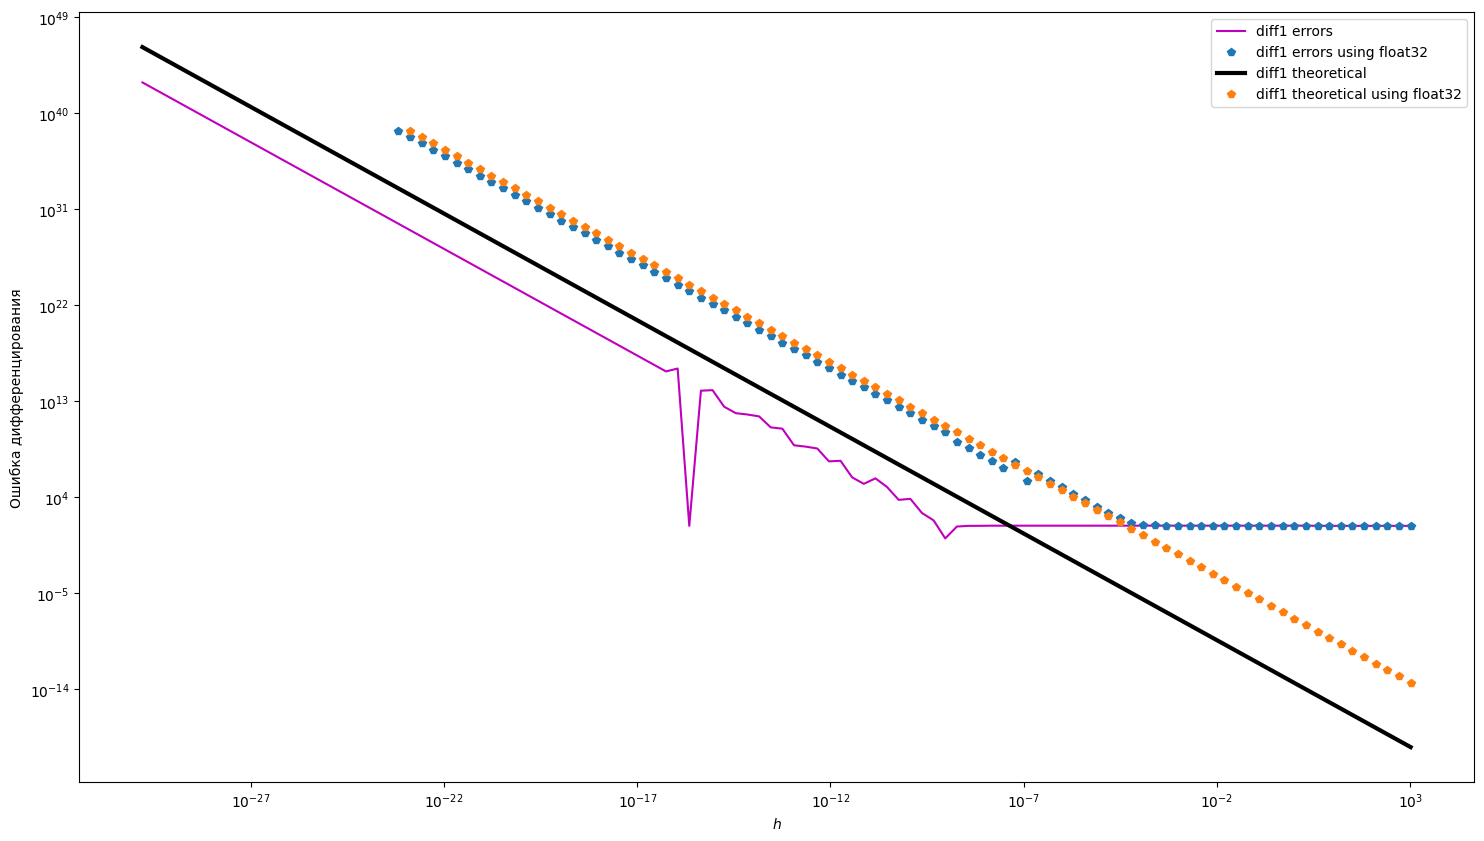

In [48]:
import matplotlib.pyplot as plt
import numpy as np
def g_deriv(x):
    return 20 * x ** 3
x0 = 1
# массив, содержащий различные шаги дифференцирования
h_array = 2.0**(-np.arange(-10, 100, 1))

errors_diff1 = []
errors_diff1_float32 = []
errors_diff1_theoretical = []
errors_diff1_theoretical_float32 = []

M = 0
P = 32

# Вычисляем значение ошибки и теоретическую оценку ошибки при различных шагах дифференцирования
for h in h_array:
    errors_diff1.append(abs(deriv_float(g_float, 1.0, float(h)) - deriv_exp(1.0)))
    errors_diff1_float32.append(abs(deriv_float32(g_float32, np.float32(1), np.float32(h)) - deriv_exp_float32(np.float32(1))))
    errors_diff1_theoretical.append((16 * P * 2 ** (-52)) / (3 * float(h) ** 2) + (M * float(h) ** 4) / 90)
    errors_diff1_theoretical_float32.append(np.float32((16 * P * 2 ** (-32)) / (3 * np.float32(h) ** 2)))

plt.figure(figsize=(18, 10))

# Рисуем в логорифмической шкале 
plt.loglog(h_array, errors_diff1, 'm', ms=7, label='diff1 errors')
plt.loglog(h_array, errors_diff1_float32, 'p', ms=6, label='diff1 errors using float32')
plt.loglog(h_array, errors_diff1_theoretical, 'k-', label='diff1 theoretical', lw=3)
plt.loglog(h_array, errors_diff1_theoretical_float32, 'p', label='diff1 theoretical using float32', lw=3)

plt.xlabel('$h$')
plt.ylabel('Ошибка дифференцирования')
plt.legend()

plt.show()

Можно заметить, что результат целиком подтвердил численные рассчёты. При использовании float128 имеем меньшее машинное эпсилон, благодаря чему и точность получается выше. С ростом h погрешности стремятся нулю, поскольку в силу того, что шестая производная функции равна 0 тождестаенно погрешнсотпи связаны лишь с вычислениями. Однако есть расхождение с погрешнсотью для float128,которое может быть связано с тем, что для такой точности наибольший вклад в погрешнсоть внесёт не вычисление функции, а арифметические операции.

Поскольку здесь не виден эффект ошибки метода, проделаем всё то же самое для sin(x):

In [49]:
def g_float(x):
    return float(np.sin(float(x)))
def g_float32(x):
    return np.float32(np.sin(x))

Поскольку 6-ая производная =  - sin(x)

Максимум модуля произодвной $M$ = 1

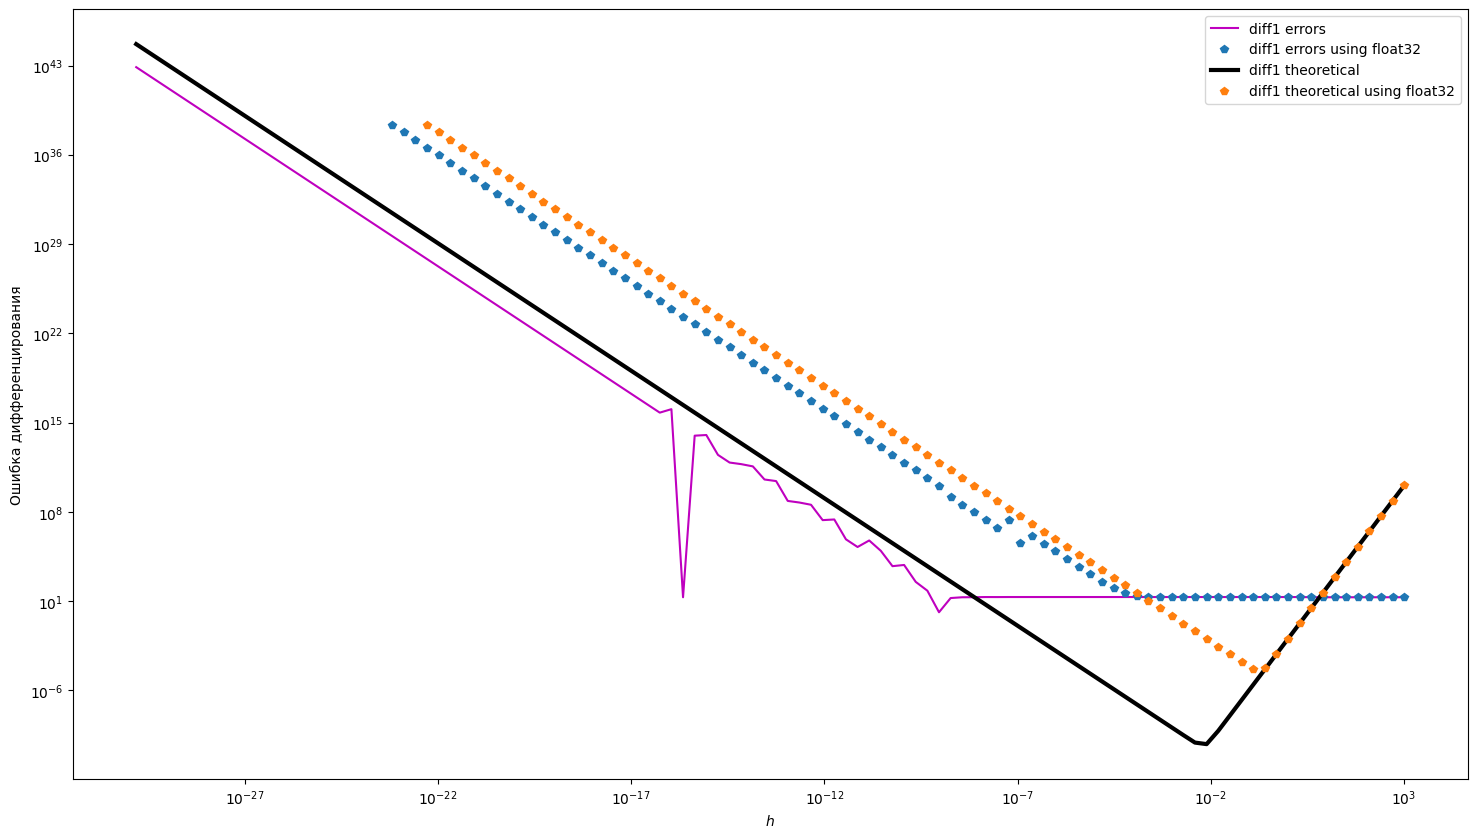

In [56]:
import matplotlib.pyplot as plt
import numpy as np
def g_deriv(x):
    return np.cos(x)
x0 = 1
# массив, содержащий различные шаги дифференцирования
h_array = 2.0**(-np.arange(-10, 100, 1))

errors_diff1 = []
errors_diff1_float32 = []
errors_diff1_theoretical = []
errors_diff1_theoretical_float32 = []

M = 1
P = 1

# Вычисляем значение ошибки и теоретическую оценку ошибки при различных шагах дифференцирования
for h in h_array:
    errors_diff1.append(abs(deriv_float(g_float, 1.0, float(h)) - deriv_exp(1.0)))
    errors_diff1_float32.append(abs(deriv_float32(g_float32, np.float32(1), np.float32(h)) - deriv_exp_float32(np.float32(1))))
    errors_diff1_theoretical.append((16 * P * 2 ** (-52)) / (3 * float(h) ** 2) + (M * float(h) ** 4) / 90)
    errors_diff1_theoretical_float32.append(np.float32((16 * P * 2 ** (-23)) / (3 * np.float32(h) ** 2)+ (M * np.float32(h) ** 4) / 90))

plt.figure(figsize=(18, 10))

# Рисуем в логорифмической шкале 
plt.loglog(h_array, errors_diff1, 'm', ms=7, label='diff1 errors')
plt.loglog(h_array, errors_diff1_float32, 'p', ms=6, label='diff1 errors using float32')
plt.loglog(h_array, errors_diff1_theoretical, 'k-', label='diff1 theoretical', lw=3)
plt.loglog(h_array, errors_diff1_theoretical_float32, 'p', label='diff1 theoretical using float32', lw=3)

plt.xlabel('$h$')
plt.ylabel('Ошибка дифференцирования')
plt.legend()

plt.show()

Можно заметить несостыковку на значениях h порядка $10^-2$, что можно объяснить погрешностью представления числа $M$ и округляния его деления на 90

# Задача 2* 

а) Применить алгоритм Архимеда для нахождения числа 𝜋 ках предела по-
следовательности периметров правильных 2𝑛 -угольников вписанных в круг единичного
диаметра. Существует рекурсивная связь между периметрами двух последовательных
многоугольников из этого класса вида:

$p_{n+1} = 2^n\sqrt{2(1-\sqrt{1-(p_n/2^n)^2})}$, p При n = 2 равно $2 \sqrt{2}$
Вычислить значения $𝑝_𝑛$ для значений 𝑛 = 3, 4, . . . , 60. Объясните результат.


б) Формулу для вычисления 𝑝𝑛 из предыдущего пункта можно улучшить, если устранить
из нее вычитание. Запишем 𝑝_{𝑛+1} в виде

$𝑝_{𝑛+1} = 2^𝑛 \sqrt{𝑟_{𝑛+1}} , 𝑟_{𝑛+1} = 𝑟_𝑛 /(2 + \sqrt{4 − 𝑟_𝑛} ), 𝑟_3 = 2/(2 + \sqrt{2}).$
Используйте полученную итерационную формулу для вычисления $𝑝_𝑛$ и $𝑟_𝑛$ при 𝑛 =
3, 4, . . . , 60. В конечном счете, разность 4 − $𝑟_𝑛$ будет округляться до значения 4. Таким образом, последняя формула также подвержена влиянию опибок округления при
больших значениях 𝑛. Однако есть ли теперь основания для беспокойства?

In [196]:
from math import sqrt
p = 2 * sqrt(2)
devider = 4
approx_pi = [p]
for n in range(3, 60):
    # print(1  - (p / devider) * (p / devider))
    p = devider * sqrt(2 * (1 - sqrt( 1  - (p / devider) * (p / devider))))
    print(p)
    devider *= 2
    approx_pi.append(p)

3.0614674589207187
3.121445152258053
3.1365484905459406
3.140331156954739
3.141277250932757
3.1415138011441455
3.1415729403678827
3.141587725279961
3.141591421504635
3.141592345611077
3.1415925765450043
3.1415926334632482
3.141592654807589
3.1415926453212153
3.1415926073757197
3.1415929109396727
3.141594125195191
3.1415965537048196
3.1415965537048196
3.1416742650217575
3.1418296818892015
3.142451272494134
3.142451272494134
3.1622776601683795
3.1622776601683795
3.4641016151377544
4.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


Построим для наглядности график зависимости отклонения от номера: 

58


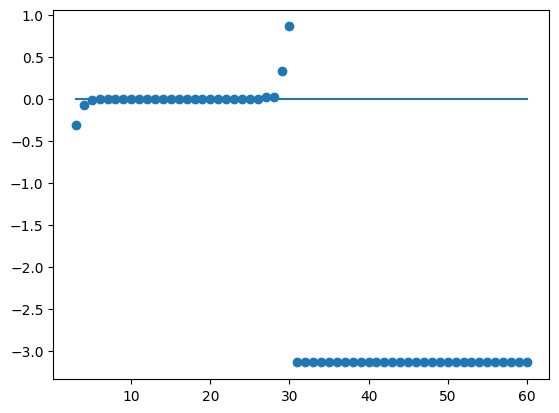

In [205]:
from math import pi
print(len(approx_pi))
plt.scatter(
  range(3, 61), [approx_pi[i]-pi for i in range(len(approx_pi))]
)
plt.plot(
    range(3, 61), [0] * 58
)

Полученный результат объясняется ошибками представления вещественных чисел в компьютере. Поскольку $p_n$ ограничено сверху (никогда не превосходит 4), При больших n число $\frac{p_n}{2^n}$ становится намного меньше UFL и машинного эпсилон, корень $\sqrt{1-(\frac{p_n}{2^n})^2}$ становится равным 1, а всё выражение - 0 (действительно, впервые это происходит при n = 30, когда выражение под корнем порядка
$2^{-30}$, а его квадрат - порядка $2^{-60}$, что меньше машинного эпсилон для float ($2^{-52}$))

In [211]:
from math import pi
p = 2 * sqrt(2)
approx_pi = [p]
devider = 4
r = 2 / (2 + sqrt(2))
for i in range(3, 61):
    approx_pi.append(devider * sqrt(r))
    r = r/(2 + sqrt(4-r))
    devider *= 2
print(approx_pi)
print(pi)

[2.8284271247461903, 3.0614674589207183, 3.1214451522580524, 3.1365484905459393, 3.140331156954753, 3.141277250932773, 3.1415138011443013, 3.1415729403670913, 3.1415877252771596, 3.1415914215111997, 3.1415923455701176, 3.1415925765848725, 3.1415926343385627, 3.1415926487769856, 3.141592652386591, 3.141592653288993, 3.141592653514593, 3.141592653570993, 3.1415926535850933, 3.141592653588618, 3.1415926535894996, 3.1415926535897203, 3.1415926535897754, 3.141592653589789, 3.1415926535897927, 3.1415926535897936, 3.1415926535897936, 3.1415926535897936, 3.1415926535897936, 3.1415926535897936, 3.1415926535897936, 3.1415926535897936, 3.1415926535897936, 3.1415926535897936, 3.1415926535897936, 3.1415926535897936, 3.1415926535897936, 3.1415926535897936, 3.1415926535897936, 3.1415926535897936, 3.1415926535897936, 3.1415926535897936, 3.1415926535897936, 3.1415926535897936, 3.1415926535897936, 3.1415926535897936, 3.1415926535897936, 3.1415926535897936, 3.1415926535897936, 3.1415926535897936, 3.14159

59


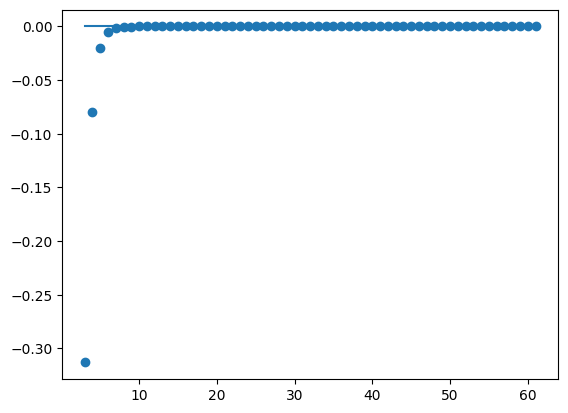

In [212]:
from math import pi
print(len(approx_pi))
plt.scatter(
  range(3, 62), [approx_pi[i]-pi for i in range(len(approx_pi))]
)
plt.plot(
    range(3, 61), [0] * 58
)

При исПользовании второго способа ошибка стремится к 0 при больших n. Можно объяснить это тем, что при округлении $4-r_n$ до 4 Получим, что $\sqrt{4-r_n} = 2$.

Получаем $r_{n+1} = r_n/4$

Поэтому $p_{n+1} = 2^n \sqrt{r_{n+1}} = \frac{2^n \sqrt{r_n}}{2} = 2^{n-1} \sqrt{r_n} = p_n$ 

Поэтому с некоторого номера ошибки округления приведут к тому, что улучшить оценку для $\pi$ мы не сможем, что не так критично, как получения с некоторого номера 0